In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\titanic\gender_submission.csv
./kaggle/input\titanic\test.csv
./kaggle/input\titanic\train.csv


In [2]:
train_data = pd.read_csv("./kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Load Test

In [3]:
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_common_embarked)

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

train_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)

train_data.drop(columns=['PassengerId', 'Name'], inplace=True)
test_data.drop(columns=['PassengerId', 'Name'], inplace=True)

In [7]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [8]:
test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [9]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [10]:
print(train_data.isna().sum().sum())
print(test_data.isna().sum().sum())

0
0


In [11]:
print(train_data.select_dtypes(include=['object']).columns)

Index(['Sex', 'Embarked'], dtype='object')


In [12]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [13]:
print(train_data.select_dtypes(include=['object']).columns)

Index([], dtype='object')


Survived
0    549
1    342
Name: count, dtype: int64


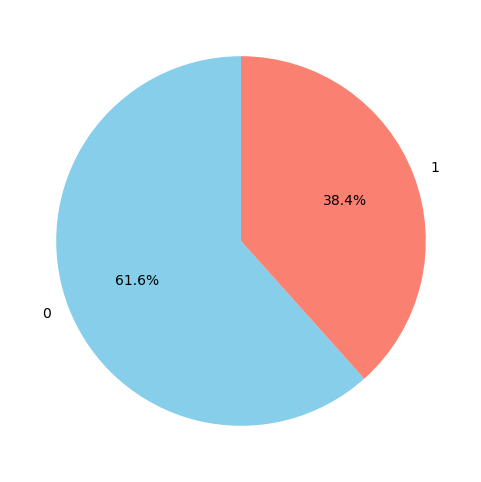

In [14]:
counts = train_data["Survived"].value_counts()
print(counts)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.show()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

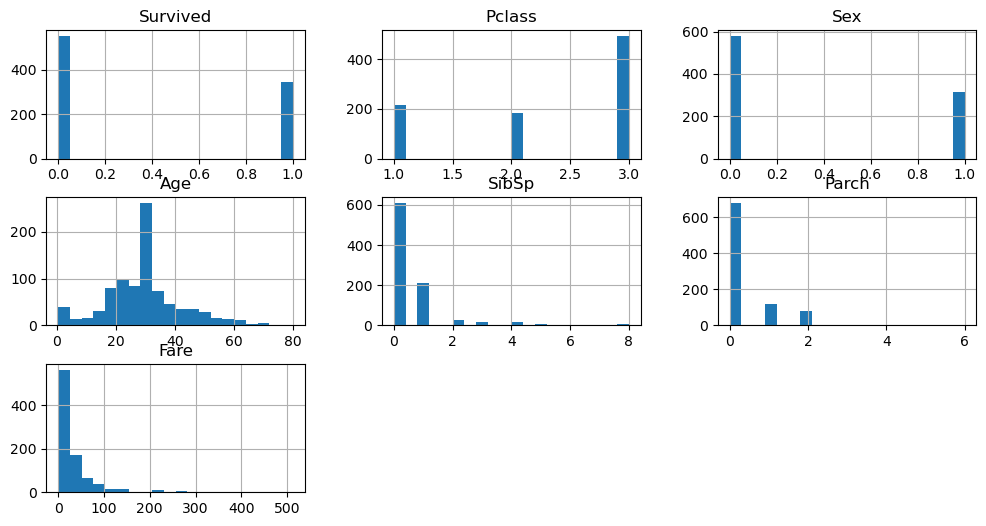

In [15]:
train_data.hist(figsize=(12, 6), bins = 20, sharex = False, sharey = False)

In [16]:
train_data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

Survived       Axes(0.125,0.53;0.133621x0.35)
Pclass      Axes(0.285345,0.53;0.133621x0.35)
Sex          Axes(0.44569,0.53;0.133621x0.35)
Age         Axes(0.606034,0.53;0.133621x0.35)
SibSp       Axes(0.766379,0.53;0.133621x0.35)
Parch          Axes(0.125,0.11;0.133621x0.35)
Fare        Axes(0.285345,0.11;0.133621x0.35)
dtype: object

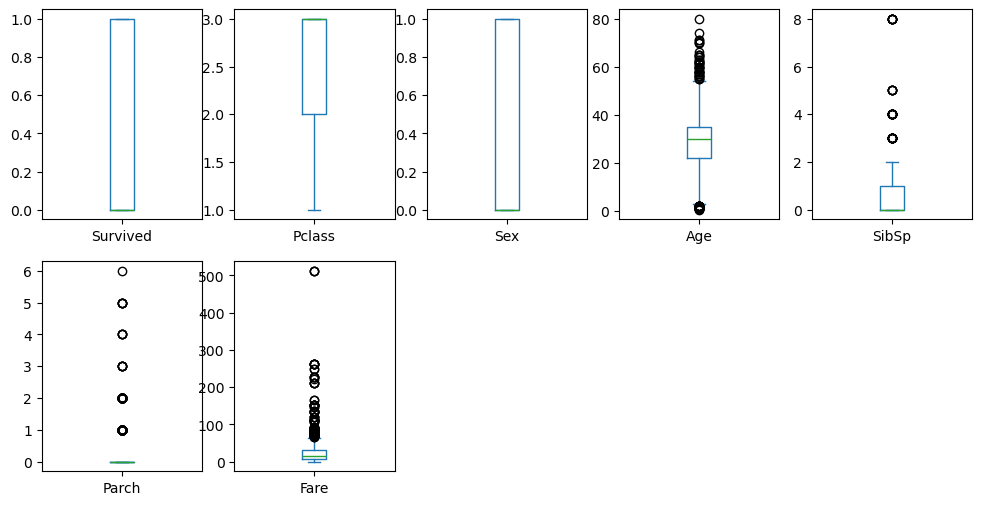

In [17]:
train_data.plot(kind="box", subplots=True, layout=(2, 5), sharex=False, sharey=False, figsize=(12,6))

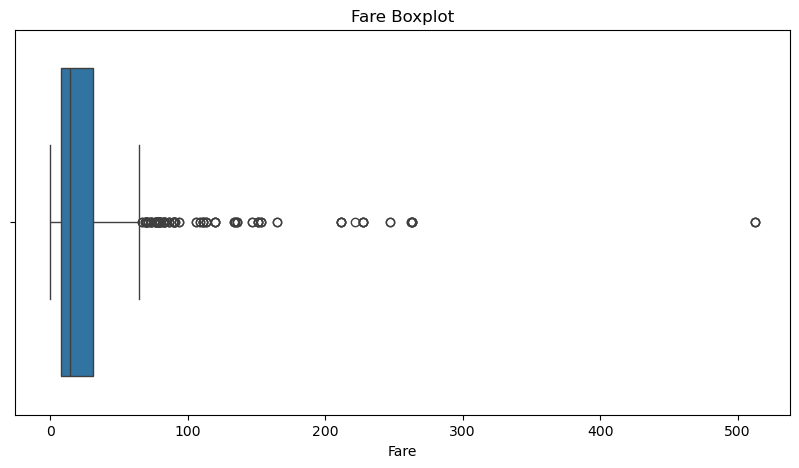

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train_data['Fare'])
plt.title('Fare Boxplot')
plt.show()

In [19]:
train_data['Fare'] = train_data['Fare'].apply(np.log1p)
test_data['Fare'] = test_data['Fare'].apply(np.log1p)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ['Age', 'Fare']:
    train_data[col] = scaler.fit_transform(train_data[[col]])
    test_data[col] = scaler.transform(test_data[[col]])



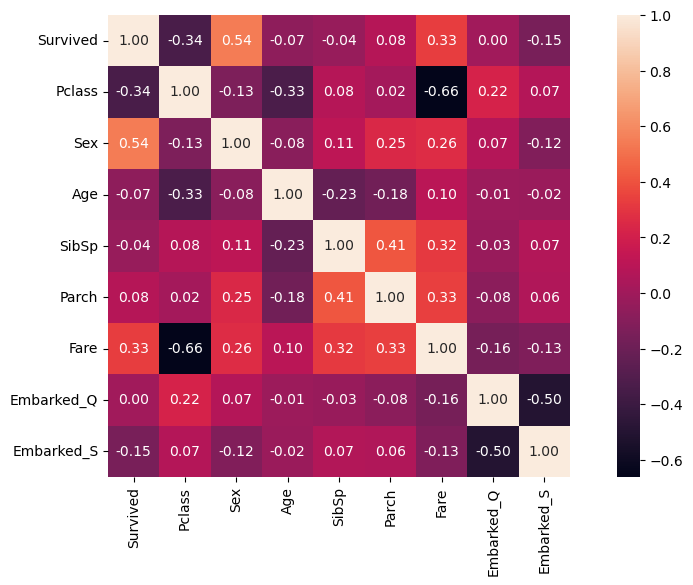

In [21]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

corrMat = train_data.corr()
plt.subplots(figsize=(12, 6))
sns.heatmap(corrMat, annot = True, fmt='.2f', annot_kws={'size': 10}, vmax=1.0, square=True)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1),
    "SVC": SVC(
        kernel="rbf",     
        probability=True,
        random_state=42
    ),
    "K-Neighbours": KNeighborsClassifier(n_neighbors=5, weights='distance')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:,1]

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"{name} Results:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC:  {roc_auc:.4f}")
    print("-" * 30)

Logistic Regression Results:
  Accuracy: 0.8101
  F1 Score: 0.7385
  ROC AUC:  0.8387
------------------------------
Random Forest Results:
  Accuracy: 0.8212
  F1 Score: 0.7538
  ROC AUC:  0.8345
------------------------------
XGBoost Results:
  Accuracy: 0.7989
  F1 Score: 0.7353
  ROC AUC:  0.8083
------------------------------
SVC Results:
  Accuracy: 0.8268
  F1 Score: 0.7559
  ROC AUC:  0.8381
------------------------------
K-Neighbours Results:
  Accuracy: 0.7989
  F1 Score: 0.7313
  ROC AUC:  0.8360
------------------------------


In [23]:
best_model = SVC(
        kernel="rbf",  
        probability=True,
        random_state=42,
    )
best_model.fit(X_train, y_train)

y_val_pred = best_model.predict(X_val)

print("Actual values (first 10):")
print(y_val.head(10))

print("\nPredicted values (first 10):")
print(pd.Series(y_val_pred).head(10))


Actual values (first 10):
565    0
160    0
553    1
860    0
241    1
559    1
387    1
536    0
698    0
99     0
Name: Survived, dtype: int64

Predicted values (first 10):
0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    0
9    0
dtype: int64


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

Confusion Matrix:
[[100  10]
 [ 21  48]]


In [25]:
# Re-create the original dataset.
test_data_orig = pd.read_csv("./kaggle/input/titanic/test.csv")

# Get the predicted data from test
test_preds = best_model.predict(test_data)

# Create a submission dataframe
submission = pd.DataFrame({
    "PassengerId": test_data_orig["PassengerId"],
    "Survived": test_preds
})

# Export to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created.")

Submission file 'submission.csv' created.
